# Моделювання газових трубопровідних систем

In [248]:
import matplotlib.pyplot as plt
import numpy as np

### Метод початкових параметрів

In [249]:
def transition_matrix_method(D,K,C,triangle):
    A = np.zeros((D,D))
    B = np.zeros((D))

    if triangle == "ABC":
        L = 5
        alpha = 1

        # field equations AB
        A[0][2], A[0][0], A[0][1], B[0] = 1, -1, 2*alpha*abs(C[1])*L, -abs(C[1])*C[1]*L
        A[1][3], A[1][1], B[1] = 1, -1, C[1] - C[3]

        # field equations BC
        A[2][6], A[2][4], A[2][5], B[2] = 1, -1, 2*alpha*abs(C[5])*L, -abs(C[5])*C[5]*L
        A[3][7], A[3][5], B[3] = 1, -1, C[5] - C[7]

        # field equations CA
        A[4][10], A[4][8], A[4][9], B[4] = 1, -1, 2*alpha*abs(C[9])*L, -abs(C[9])*C[9]*L
        A[5][11], A[5][9], B[5] = 1, -1, C[9] - C[11]

        # edge equations
        A[6][0], B[6] = 1, 20*20
        A[7][4], B[7] = 1, 6*6
        A[8][8], B[8] = 1, 10*10

        # transition equations A
        A[9][10], A[9][0] = 1, -1

        # transition equations B
        A[10][4], A[10][2] = 1, -1

        # transition equations C
        A[11][8], A[11][6] = 1, -1

    if triangle == "ABCD":
        # field equations
        for i,j in zip(range(0,2*K-1,2),range(0,D,4)):
            if i < 12:
                alpha = 1
                L = 2.5
                A[i][2+j], A[i][0+j], A[i][1+j], B[i] = 1, -1, 2*alpha*abs(C[1+j])*L, -abs(C[1+j])*C[1+j]*L
                A[i+1][3+j], A[i+1][1+j], B[i+1] = 1, -1, C[1+j] - C[3+j]
            else:
                alpha = 1/3
                L = 5*np.sqrt(5)/6
                A[i][2+j], A[i][0+j], A[i][1+j], B[i] = 1, -1, 2*alpha*abs(C[1+j])*L, -abs(C[1+j])*C[1+j]*L
                A[i+1][3+j], A[i+1][1+j], B[i+1] = 1, -1, C[1+j] - C[3+j]

        # edge equations
        A[18][0], B[18] = 1, 20*20
        A[19][8], B[19] = 1, 6*6
        A[20][16], B[20] = 1, 10*10

        # transition equations A
        A[21][22], A[21][0] = 1, -1

        # transition equations B
        A[22][8], A[22][6] = 1, -1

        # transition equations C
        A[23][16], A[23][14] = 1, -1

        # node equations D0
        A[24][32], A[24][28] = 1, -1
        A[25][32], A[25][26] = 1, -1
        A[26][27], A[26][33], A[26][29], B[26] = 1, -1, -1, C[29] + C[33] - C[27]

        # node equations D1
        A[27][20], A[27][18] = 1, -1
        A[28][20], A[28][34] = 1, -1
        A[29][35], A[29][19], A[29][21], B[29] = 1, 1, -1, C[21] - C[19] - C[35]

        # node equations D2
        A[30][12], A[30][10] = 1, -1
        A[31][12], A[31][30] = 1, -1
        A[32][11], A[32][31], A[32][13], B[32] = 1, 1, -1, C[13] - C[31] - C[11]

        # node equations D2
        A[33][24], A[33][2] = 1, -1
        A[34][24], A[34][4] = 1, -1
        A[35][3], A[35][25], A[35][5], B[35] = 1, -1, -1, C[5] + C[25] - C[3]

    A_inv = np.linalg.inv(A)
    X = np.dot(A_inv,B)

    return X

![image](ABC.png)

In [250]:
triangle = "ABC"
iterations = 1000

N = 2
K = 3
D = 2*N*K

L = 5
eta = 0.01

C = np.zeros((D))
for i in range(1,len(C),2):
    C[i] = 5

Qs = [[C[i] for i in range(len(C)) if i % (2*N) == 1]]

for cycle in range(iterations):
    X = transition_matrix_method(D,K,C,triangle)
    Qs.append([X[i] for i in range(len(X)) if i % (2*N) == 1])

    for i in range(1,len(C),2):
        C[i] = C[i] + eta*X[i]

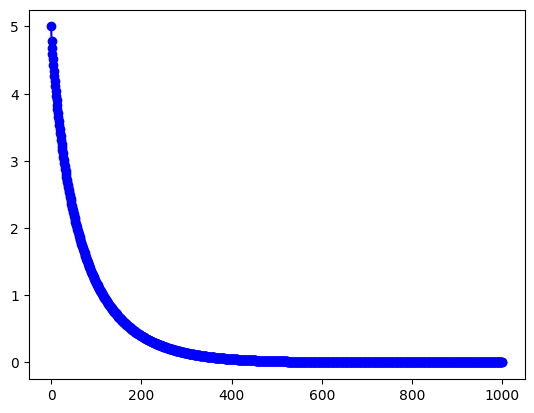

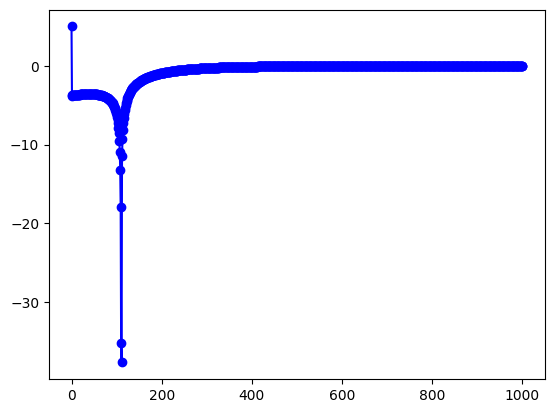

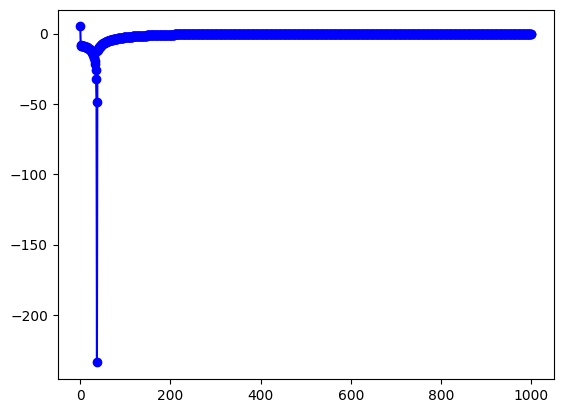

In [251]:
for j in range(len(Qs[0])):
    plt.plot([Qs[i][j] for i in range(len(Qs))], marker="o", color="blue")
    plt.show()

In [252]:
# x = np.arange(0, len([Qs[i][2] for i in range(len(Qs))]), 1)
# y = [Qs[i][2] for i in range(len(Qs))]

# print("x y")
# for i in range(len(x)):
#     print(f"{x[i]} {y[i]}")

In [253]:
print(f"{iterations} iterations:")
print(f"    P: {[X[i] for i in range(len(X)) if i % 4 == 0]}")
print(f"    QS : {[X[i] for i in range(len(X)) if i % (2*N) == 1]}")
print(f"    max(Qs): {max([abs(X[i]) for i in range(len(X)) if i % 2 != 0])}")
print(f"    Qtr    : {[C[i] for i in range(len(X)) if i % (2*N) == 1]}")

1000 iterations:
    P: [400.0, 36.0, 100.0]
    QS : [0.00012182131951049557, -0.00023023370268715482, -0.00022362316491624954]
    max(Qs): 0.00023023370268715482
    Qtr    : [8.532171000843963, -3.5774808400420346, -7.745745308709525]


In [254]:
alpha = 1
L = 5

index = 8

print(f"{X[index+2]} = {X[index]} - {2} \cdot {alpha} \cdot {abs(C[index+1])} \cdot {X[index+1]} \cdot {L} - {abs(C[index+1])} \cdot {C[index+1]} \cdot {L}")

print(X[index+2])
print(X[index] - 2*alpha*abs(C[index+1])*L*X[index+1] - abs(C[index+1])*C[index+1]*L)

print(X[index+2] - (X[index] - 2*alpha*abs(C[index+1])*L*X[index+1] - abs(C[index+1])*C[index+1]*L))

400.0 = 100.0 - 2 \cdot 1 \cdot 7.745745308709525 \cdot -0.00022362316491624954 \cdot 5 - 7.745745308709525 \cdot -7.745745308709525 \cdot 5
400.0
400.00017321778375
-0.0001732177837538984


![image](ABCD.png)

In [255]:
triangle = "ABCD"
iterations = 1000

N = 2
K = 9
D = 2*N*K

eta = 0.01

C = np.zeros((D))
for i in range(1,len(C),2):
    C[i] = 5

Qs = [[C[i] for i in range(len(C)) if i % (2*N) == 1]]

for cycle in range(iterations):
    X = transition_matrix_method(D,K,C,triangle)
    Qs.append([X[i] for i in range(len(X)) if i % (2*N) == 1])

    for i in range(1,len(C),2):
        C[i] = C[i] + eta*X[i]

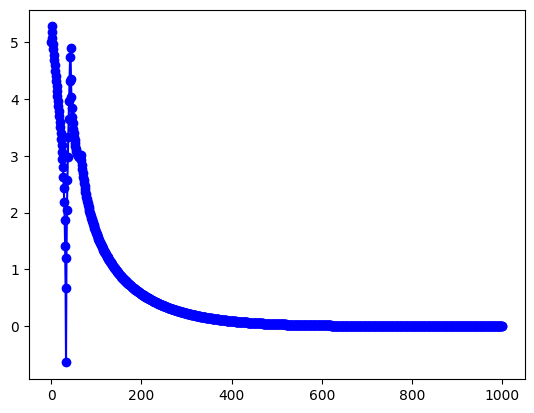

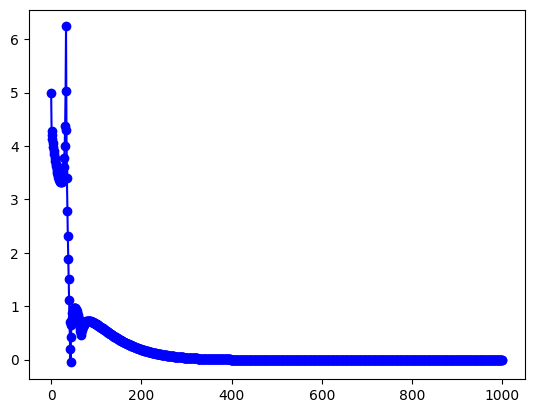

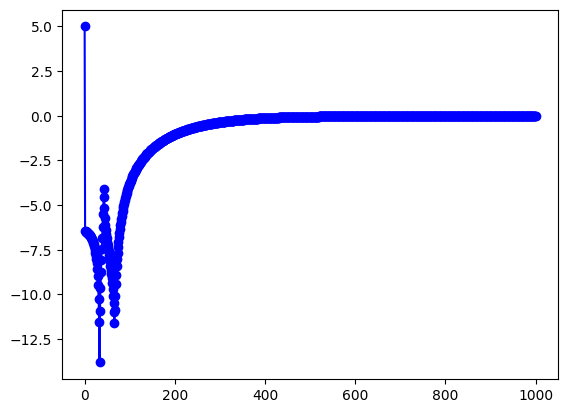

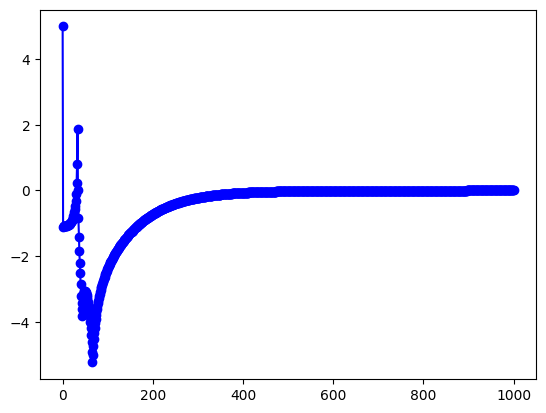

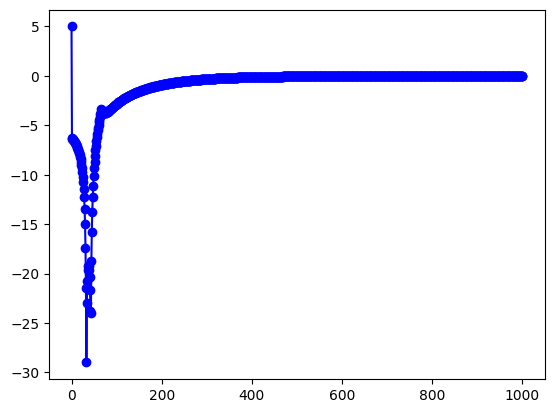

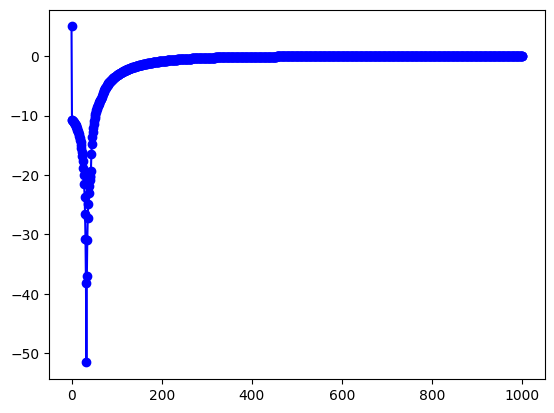

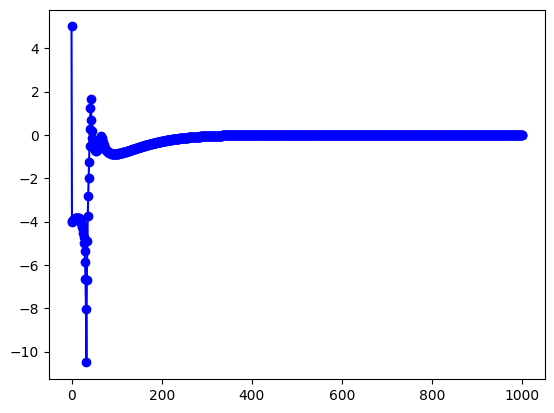

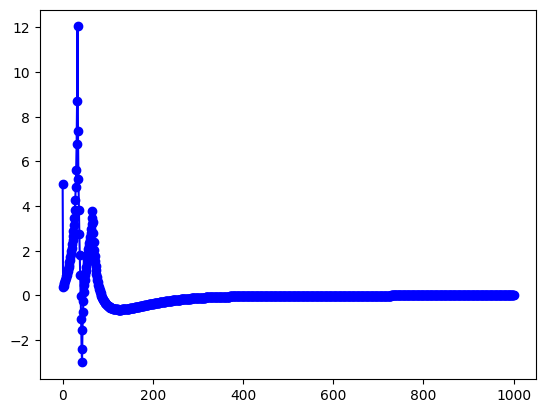

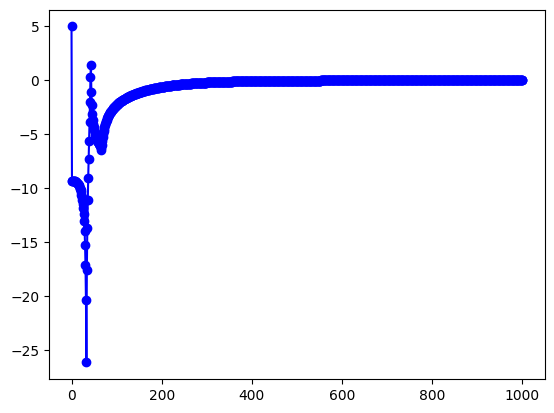

In [256]:
for j in range(len(Qs[0])):
    plt.plot([Qs[i][j] for i in range(len(Qs))], marker="o", color="blue")
    plt.show()

In [257]:
# x = np.arange(0, len([Qs[i][0] for i in range(len(Qs))]), 1)
# y = [Qs[i][8] for i in range(len(Qs))]

# print("x y")
# for i in range(len(x)):
#     print(f"{x[i]} {y[i]}")

In [258]:
print(f"{iterations} iterations:")
print(f"    P: {[X[i] for i in range(len(X)) if i % 4 == 0]}")
print(f"    QS : {[X[i] for i in range(len(X)) if i % (2*N) == 1]}")
print(f"    max(Qs): {max([abs(X[i]) for i in range(len(X)) if i % 2 != 0])}")
print(f"    Qtr    : {[C[i] for i in range(len(X)) if i % (2*N) == 1]}")

1000 iterations:
    P: [400.0, 170.91458437038287, 36.0, 100.93847299969472, 99.99999999999999, 184.28113525922765, 170.91458437038287, 161.67827582093395, 161.67827582093395]
    QS : [0.0002562604582780903, -5.1064519930421604e-05, -0.0003084700666058371, -0.00013510467728705677, -0.00032731415331058167, -0.00019335456440386367, 8.92883751274498e-05, -4.467121376799943e-05, -8.407701418050584e-05]
    max(Qs): 0.00032731415331058167
    Qtr    : [9.572319953861724, 7.34619469558341, -5.096300278704185, 0.6128239021812827, -5.805918652057952, -9.288917574665104, 2.2263411145153635, 5.7093400371225185, -3.482783066370102]


In [259]:
eq_index = np.arange(0,D,4)
error = []

for index in eq_index:
    if index < 20:
        alpha = 1
        L = 2.5
        error.append(X[index+2] - (X[index] - 2*alpha*abs(C[index+1])*L*X[index+1] - abs(C[index+1])*C[index+1]*L))
    else:
        alpha = 1/3
        L = 5*np.sqrt(5)/6
        error.append(X[index+2] - (X[index] - 2*alpha*abs(C[index+1])*L*X[index+1] - abs(C[index+1])*C[index+1]*L))

print(error)
print(max(error))

[0.00012265362198604635, -1.875636550607851e-05, -7.860753824218136e-05, -4.13886070305125e-06, -9.502329731958525e-05, 54.93591160812446, 7.408428558619562e-06, -9.50487255124699e-06, -1.0912918156691376e-05]
54.93591160812446
